In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import math
import networkx as nx


In [2]:
% cd ..

/Users/cedoz/Documents/Stanford/CS224W/Network-Analysis-of-Human-Protein-Interaction-Network


In [3]:
from read_graph import read_graph
from common.pipeline import Pipeline
from common.feature_generators import *
from validation import *

In [4]:
cancer = get_cancer()
mendelian = get_mendelian()
drugbank_target_all = get_drugbank(molecule_type="target", subset="all")

In [14]:
Graph, node_names = read_graph(directed=False)

In [109]:
pipeline = Pipeline(Degree())
features = pipeline.apply(Graph, verbose=True)

degree_undirected


In [117]:
scores = features[:,0]
ordered_nodes_Id = np.array(node_names.keys())[scores.argsort()[::-1]].tolist()
ordered_nodes_names = np.array(node_names.values())[scores.argsort()[::-1]].tolist()
gene_rank = scores.copy()
gene_rank.sort()
gene_rank = gene_rank[::-1].tolist()

In [120]:
gene_rank.tolist()

[7873.0,
 6740.0,
 6225.0,
 6099.0,
 5935.0,
 5848.0,
 5626.0,
 5520.0,
 5211.0,
 5180.0,
 5171.0,
 5090.0,
 4978.0,
 4969.0,
 4964.0,
 4867.0,
 4852.0,
 4827.0,
 4822.0,
 4816.0,
 4712.0,
 4697.0,
 4683.0,
 4673.0,
 4661.0,
 4657.0,
 4584.0,
 4572.0,
 4552.0,
 4521.0,
 4509.0,
 4450.0,
 4424.0,
 4388.0,
 4380.0,
 4334.0,
 4325.0,
 4287.0,
 4269.0,
 4263.0,
 4250.0,
 4233.0,
 4186.0,
 4184.0,
 4170.0,
 4158.0,
 4117.0,
 4113.0,
 4101.0,
 4078.0,
 4056.0,
 4019.0,
 4018.0,
 4016.0,
 4009.0,
 4000.0,
 3999.0,
 3999.0,
 3991.0,
 3989.0,
 3980.0,
 3976.0,
 3971.0,
 3953.0,
 3950.0,
 3905.0,
 3895.0,
 3870.0,
 3854.0,
 3850.0,
 3828.0,
 3815.0,
 3809.0,
 3803.0,
 3792.0,
 3788.0,
 3783.0,
 3730.0,
 3720.0,
 3711.0,
 3704.0,
 3704.0,
 3701.0,
 3699.0,
 3698.0,
 3694.0,
 3693.0,
 3690.0,
 3684.0,
 3683.0,
 3673.0,
 3668.0,
 3661.0,
 3651.0,
 3644.0,
 3642.0,
 3641.0,
 3640.0,
 3635.0,
 3633.0,
 3614.0,
 3604.0,
 3587.0,
 3582.0,
 3579.0,
 3577.0,
 3576.0,
 3574.0,
 3567.0,
 3566.0,
 3559.0,
 

In [95]:
scores

array([  7.87300000e+03,   6.74000000e+03,   6.22500000e+03, ...,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00])

In [51]:
scores.argsort().tolist()

[19575,
 19549,
 19522,
 19547,
 19546,
 19544,
 19541,
 19360,
 18702,
 19538,
 19287,
 19511,
 19534,
 19515,
 19531,
 19516,
 19518,
 19519,
 19550,
 19574,
 19548,
 19479,
 19573,
 19572,
 19571,
 19570,
 19569,
 19566,
 19565,
 19405,
 19563,
 19562,
 19523,
 19561,
 19560,
 19556,
 19370,
 19463,
 19520,
 19384,
 19415,
 18262,
 19484,
 19326,
 19499,
 19471,
 19438,
 19129,
 17747,
 19382,
 19375,
 19481,
 18106,
 19466,
 19525,
 19568,
 19567,
 19557,
 19555,
 19553,
 19524,
 19543,
 19031,
 19536,
 19552,
 19532,
 19293,
 19526,
 18620,
 19527,
 19529,
 19528,
 19554,
 19483,
 19512,
 19559,
 19436,
 19443,
 19449,
 19450,
 19393,
 19482,
 19521,
 19495,
 17222,
 19545,
 18935,
 19355,
 17047,
 17441,
 18899,
 19362,
 11863,
 19540,
 18800,
 19346,
 19445,
 19073,
 19242,
 18793,
 18849,
 18917,
 18164,
 19429,
 19424,
 19380,
 17564,
 19311,
 19435,
 19411,
 19407,
 19486,
 19539,
 19558,
 7434,
 19510,
 19504,
 19506,
 19551,
 19564,
 19500,
 19333,
 19401,
 19434,
 18495,
 

In [39]:
features[0]

array([ 2582.])

In [29]:
from collections import Counter
test = Counter(test)

In [31]:
np.log10(3)

0.47712125471966244

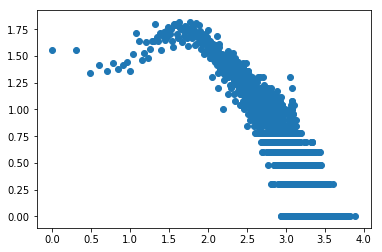

In [33]:
x = test.keys()
y = test.values()
plt.scatter(np.log10(x), np.log10(y))

## Enrichr: http://amp.pharm.mssm.edu/Enrichr/#

In [ ]:
gene_list = ['CTLA2B', 'SCARA3', 'LOC100044683', 'CMBL', 'CLIC6', 'IL13RA1', 'TACSTD2', 'DKKL1', 'CSF1', 'CITED1']
gene_rank = 3*np.random.random(len(gene_list))
rnk = pd.DataFrame(np.array([gene_list, gene_rank]).T, columns = ['gene', 'score'])
rnk

#rnk = pd.DataFrame(np.array([gene_list]).T)
#rnk

In [ ]:
enr = gp.enrichr(gene_list=gene_list, description='pathway', gene_sets='KEGG_2016', outdir='test', cutoff=0.05, format='png')
#enr = gp.enrichr(gene_list=gene_list, description='pathway', gene_sets=u'ARCHS4_Cell-lines', outdir='test', cutoff=0.05, format='png')
enr.res2d[enr.res2d["Adjusted P-value"]<0.1]

## Prerank: http://software.broadinstitute.org/cancer/software/genepattern/modules/docs/GSEAPreranked/1

In [ ]:
pre_res = gp.prerank(rnk=rnk, gene_sets='KEGG_2016', outdir='prerank_report',format='png')
pre_res.res2d.head()

## Cancer gene Census (Controllability Paper)

In [ ]:
cancer_gene_census = pd.read_csv("cancer_gene_census.csv")
gene_symbols = cancer_gene_census.loc[:,"Gene Symbol"]
gene_names = cancer_gene_census.loc[:,"Name"]
gene_string = []
list_of_synonyms = cancer_gene_census.loc[:,"Synonyms"]
for synonyms in list_of_synonyms:
    if str(synonyms) != 'nan':        
        for synonym in synonyms.split(','):
            if synonym[:3] == "ENS":
                gene_string.append(synonym)
print "Number of genes = ", len(gene_symbols)

In [ ]:
#with open("mimTitles.txt", "r") as f:
gene_entrez = []
gene_symbols = []
gene_string = []
with open("validation_datasets/mim2gene.txt") as f:
    for line in f:
        if len(line.split('\t'))>1:
            print line
            if line.split('\t')[1] == "gene":
                if len(line.split('\t'))>2:
                    gene_entrez.append(line.split('\t')[2])
                    gene_symbols.append(line.split('\t')[3])
                    gene_string.append(line.split('\t')[4])

print "Nb of genes =", len(gene_string)

In [ ]:
#subset: "all" or "approved"
#molecule_type: "carrier", "enzyme", "target", "transporter"
def get_drug_bank(subset="all", molecule_type="target"):
    data = pandas.read_csv("validation_datasets/drugbank_%s_%s_polypeptide_ids.csv/all.csv"%(subset, molecule_type))
    data = data[data["Species"]=="Human"]
    gene_names = data["Gene Name"].values.tolist()
    protein_names = data["Name"].values.tolist()
    uniprot_ID = data["UniProt ID"].values.tolist()
    return gene_names, protein_names, uniprot_ID

gene_names, protein_names, uniprot_ID = get_drug_bank(subset="all", molecule_type="transporter")